# Advanced Model Architectures
>  It's time to get introduced to more advanced architectures! You will create an autoencoder to reconstruct noisy images, visualize convolutional neural network activations, use deep pre-trained models to classify images and learn more about recurrent neural networks and working with text as you build a network that predicts the next word in a sentence.

- toc: true 
- badges: true
- comments: true
- author: Lucas Nunes
- categories: [Datacamp]
- image: images/datacamp/___

> Note: This is a summary of the course's chapter 4 exercises "Introduction to Deep Learning with Keras" at datacamp. <br>[Github repo](https://github.com/lnunesAI/Datacamp/) / [Course link](https://www.datacamp.com/tracks/machine-learning-scientist-with-python)

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams['figure.figsize'] = (8, 8)

In [35]:
import tensorflow as tf
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Dense
from keras.callbacks import EarlyStopping, ModelCheckpoint

## Tensors, layers, and autoencoders

### It's a flow of tensors

<div class=""><p>If you have already built a model, you can use the <code>model.layers</code> and the <code>keras.backend</code> to build functions that, provided with a valid input tensor, return the corresponding output tensor.</p>
<p>This is a useful tool when we want to obtain the output of a network at an intermediate layer.</p>
<p>For instance, if you get the input and output from the first layer of a network, you can build an <code>inp_to_out</code> function that returns the result of carrying out forward propagation through only the first layer for a given input tensor.</p>
<p>So that's what you're going to do right now! </p>
<p><code>X_test</code> from the <strong>Banknote Authentication</strong> dataset and its <code>model</code> are preloaded. Type <code>model.summary()</code> in the console to check it.</p></div>

In [ ]:
df = pd.read_csv('https://github.com/lnunesAI/Datacamp/raw/main/2-machine-learning-scientist-with-python/16-introduction-to-deep-learning-with-keras/datasets/banknotes_1372x5.csv')

In [ ]:
from sklearn.model_selection import train_test_split
X, y = df.iloc[:, :-1].values, df.iloc[:, -1].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [ ]:
model = Sequential()
model.add(Dense(2, input_shape=(4, ), activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.summary()

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_14 (Dense)             (None, 2)                 10        
_________________________________________________________________
dense_15 (Dense)             (None, 1)                 3         
Total params: 13
Trainable params: 13
Non-trainable params: 0
_________________________________________________________________


Instructions
<ul>
<li>Import <code>keras.backend</code> as <code>K</code>.</li>
<li>Use the <code>model.layers</code> list to get a reference to the input and output of the first layer.</li>
<li>Use <code>K.function()</code> to define a function that maps <code>inp</code> to <code>out</code>.</li>
<li>Print the results of passing <code>X_test</code> through the 1st layer.</li>
</ul>

In [ ]:
# Import keras backend
import keras.backend as K

# Input tensor from the 1st layer of the model
inp = model.layers[0].input

# Output tensor from the 1st layer of the model
out = model.layers[0].output

# Define a function from inputs to outputs
inp_to_out = K.function([inp], [out])

# Print the results of passing X_test through the 1st layer
print(inp_to_out([X_test]))

[array([[0.        , 0.11028124],
       [0.        , 0.        ],
       [0.84509635, 0.4500638 ],
       [0.        , 0.        ],
       [0.16332605, 0.        ],
       [0.4224509 , 0.6067911 ],
       [0.        , 0.        ],
       [0.6120651 , 0.03012703],
       [0.84505844, 0.59344465],
       [1.0984544 , 0.8404937 ],
       [0.        , 0.        ],
       [0.        , 0.        ],
       [0.27899662, 0.41092342],
       [1.1229665 , 0.        ],
       [0.60780126, 0.57995594],
       [0.        , 0.        ],
       [0.359186  , 0.        ],
       [0.1911863 , 0.        ],
       [0.        , 0.        ],
       [0.        , 0.        ],
       [0.        , 0.        ],
       [0.        , 0.        ],
       [0.5275166 , 0.6555131 ],
       [0.8068037 , 0.6964802 ],
       [0.29656115, 0.        ],
       [0.5543453 , 0.9034432 ],
       [1.8709476 , 0.8868127 ],
       [0.46833992, 0.        ],
       [0.        , 0.        ],
       [0.        , 0.        ],
       [0

### Neural separation

<div class=""><p>Put on your gloves because you're going to perform brain surgery! </p>
<p>Neurons learn by updating their weights to output values that help them better distinguish between the different output classes in your dataset.
You will make use of the <code>inp_to_out()</code> function you just built to visualize the output of two neurons in the first layer of the <strong>Banknote Authentication</strong> <code>model</code> as it learns. </p>
<p>The <code>model</code> you built in chapter 2 is ready for you to use, just like <code>X_test</code> and <code>y_test</code>. Paste <code>show_code(plot)</code> in the console if you want to check <code>plot()</code>.</p>
<p>You're performing heavy duty, once all is done, click through the graphs to watch the separation live!</p></div>

In [ ]:
def plot():
  fig, ax = plt.subplots()
  plt.scatter(layer_output[:, 0], layer_output[:, 1],c = y_test,edgecolors='none')
  plt.title('Epoch: {}, Test Accuracy: {:3.1f} %'.format(i+1, test_accuracy * 100.0))
  plt.show()

In [ ]:
model.compile(optimizer='sgd', loss='binary_crossentropy', metrics=['accuracy'])

Instructions
<ul>
<li>Use the previously defined <code>inp_to_out()</code> function to get the outputs of the first layer when fed with <code>X_test</code>.</li>
<li>Use the <code>model.evaluate()</code> method to obtain the validation accuracy for the test dataset at each epoch.</li>
</ul>

13/13 [==============================] - 0s 1ms/step - loss: 0.7103 - accuracy: 0.5364


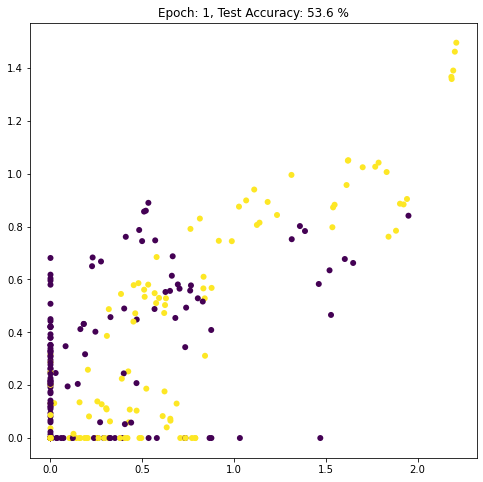

13/13 [==============================] - 0s 1ms/step - loss: 0.6254 - accuracy: 0.6869


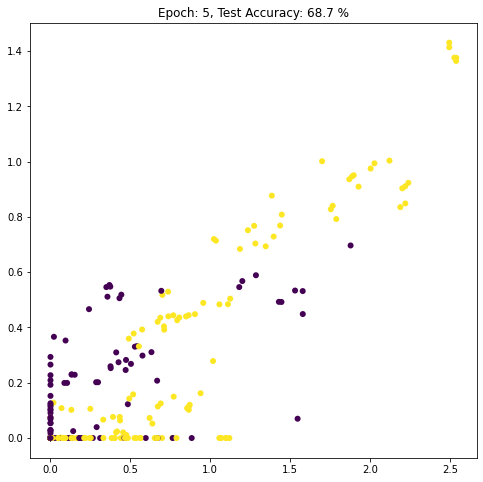

13/13 [==============================] - 0s 1ms/step - loss: 0.5717 - accuracy: 0.7476


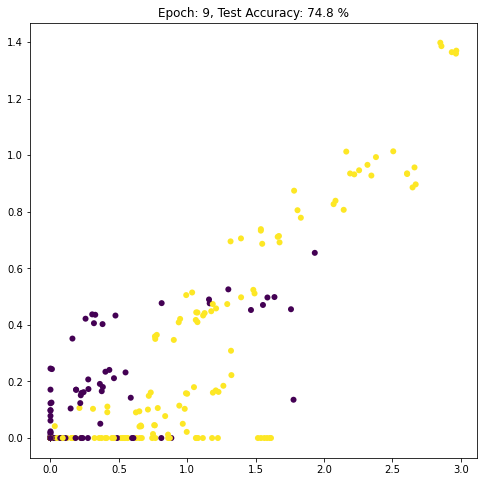

13/13 [==============================] - 0s 1ms/step - loss: 0.5198 - accuracy: 0.8058


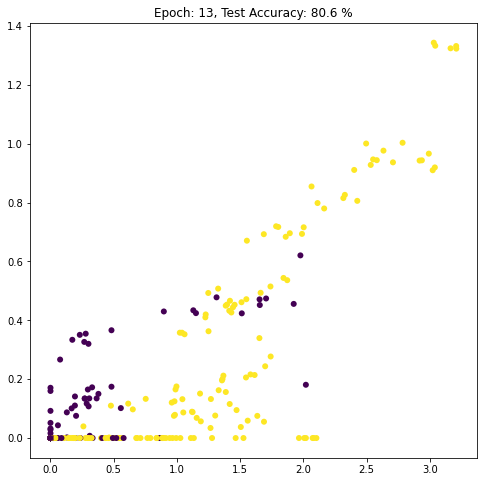

13/13 [==============================] - 0s 1ms/step - loss: 0.4658 - accuracy: 0.8350


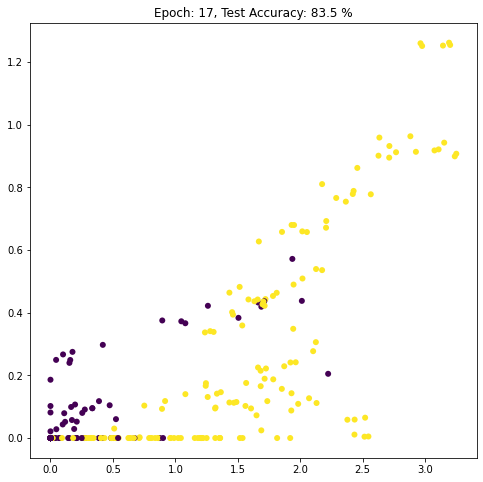

13/13 [==============================] - 0s 1ms/step - loss: 0.4094 - accuracy: 0.8714


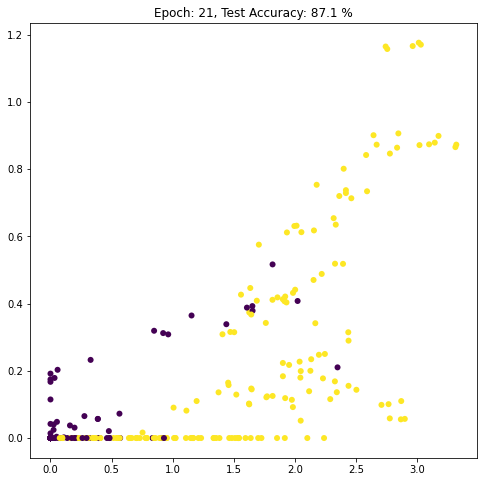

In [ ]:
for i in range(0, 21):
  	# Train model for 1 epoch
    h = model.fit(X_train, y_train, batch_size = 16, epochs = 1, verbose = 0)
    if i%4==0: 
      # Get the output of the first layer
      layer_output = inp_to_out([X_test])[0]
      
      # Evaluate model accuracy for this epoch
      test_accuracy = model.evaluate(X_test, y_test)[1] 
      
      # Plot 1st vs 2nd neuron output
      plot()

**That took a while! If you take a look at the graphs you can see how the neurons are learning to spread out the inputs based on whether they are fake or legit dollar bills. (A single fake dollar bill is represented as a purple dot in the graph) At the start the outputs are closer to each other, the weights are learned as epochs go by so that fake and legit dollar bills get a different, further and further apart output.**

### Building an autoencoder

<div class=""><p>Autoencoders have several interesting applications like anomaly detection or image denoising. They aim at producing an output identical to its inputs. The input will be compressed into a lower dimensional space, <strong>encoded</strong>. The model then learns to <strong>decode</strong> it back to its original form. </p>
<p>You will encode and decode the <strong>MNIST</strong> dataset of handwritten digits, the hidden layer will encode a 32-dimensional representation of the image, which originally consists of 784 pixels (28 x 28). The autoencoder will essentially learn to turn the 784 pixels original image into a compressed 32 pixels image and learn how to use that encoded representation to bring back the original 784 pixels image.</p>
<p>The <code>Sequential</code> model and <code>Dense</code> layers are ready for you to use.</p>
<p>Let's build an autoencoder!</p></div>

Instructions
<ul>
<li>Create a <code>Sequential</code> model.</li>
<li>Add a dense layer with as many neurons as the encoded image dimensions and <code>input_shape</code> the number of pixels in the original image.</li>
<li>Add a final layer with as many neurons as pixels in the input image.</li>
<li>Compile your <code>autoencoder</code> using <code>adadelta</code> as an optimizer and <code>binary_crossentropy</code> loss, then summarise it.</li>
</ul>

In [ ]:
# Start with a sequential model
autoencoder = Sequential()

# Add a dense layer with input the original image pixels and neurons the encoded representation
autoencoder.add(Dense(32, input_shape=(28*28, ), activation="relu"))

# Add an output layer with as many neurons as the orginal image pixels
autoencoder.add(Dense(784, activation = "sigmoid"))

# Compile your model with adadelta
autoencoder.compile(optimizer = 'adam', loss = 'binary_crossentropy',  metrics=['accuracy']) #Adadelta

# Summarize your model structure
autoencoder.summary()

Model: "sequential_20"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_24 (Dense)             (None, 32)                25120     
_________________________________________________________________
dense_25 (Dense)             (None, 784)               25872     
Total params: 50,992
Trainable params: 50,992
Non-trainable params: 0
_________________________________________________________________


**Your autoencoder is now ready. Let's see what you can do with it!**

### De-noising like an autoencoder

<div class=""><p>Okay, you have just built an <code>autoencoder</code> model. Let's see how it handles a more challenging task.</p>
<p>First, you will build a model that encodes images, and you will check how different digits are represented with <code>show_encodings()</code>. To build the encoder you will make use of your <code>autoencoder</code>, that has already being trained. You will just use the first half of the network, which contains the input and the bottleneck output. That way, you will obtain a 32 number output which represents the encoded version of the input image. </p>
<p>Then, you will apply your <code>autoencoder</code> to noisy images from <code>MNIST</code>, it should be able to clean the noisy artifacts. </p>
<p><code>X_test_noise</code> is loaded in your workspace. The digits in this noisy dataset look like this:</p>
<p><img src="https://assets.datacamp.com/production/repositories/4335/datasets/55f20c8d36688a6a83b2609ef574c0965915e012/noisy_mnist_sample.png"></p>
<p>Apply the power of the autoencoder!</p></div>

In [ ]:
%%capture
!wget https://github.com/lnunesAI/Datacamp/raw/main/2-machine-learning-scientist-with-python/16-introduction-to-deep-learning-with-keras/datasets/digits_noise.h5

In [3]:
from tensorflow.keras.datasets import mnist
(X_train, y_train), (X_test, y_test) = mnist.load_data()
X_train = X_train.astype('float32') / 255.
X_test = X_test.astype('float32') / 255.
X_train = X_train.reshape((len(X_train), np.prod(X_train.shape[1:])))
X_test = X_test.reshape((len(X_test), np.prod(X_test.shape[1:])))

11493376/11490434 [==============================] - 0s 0us/step


In [ ]:
autoencoder.fit(X_train, X_train,
                epochs=100,
                batch_size=256,
                #shuffle=True,
                validation_data=(X_test, X_test), verbose=0) #verbose=0

In [ ]:
def show_encodings(encoded_imgs,number=1):
    n = 5  # how many digits we will display
    original = X_test_noise
    original = original[np.where(y_test == number)]
    encoded_imgs = encoded_imgs[np.where(y_test==number)]
    plt.figure(figsize=(20, 4))
    #plt.title('Original '+str(number)+' vs Encoded representation')
    for i in range(min(n,len(original))):
        # display original imgs
        ax = plt.subplot(2, n, i + 1)
        plt.imshow(original[i].reshape(28, 28))
        plt.gray()
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)

        # display encoded imgs
        ax = plt.subplot(2, n, i + 1 + n)
        plt.imshow(np.tile(encoded_imgs[i],(32,1)))
        plt.gray()
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)
    plt.show()

In [ ]:
def compare_plot(original,decoded_imgs):
    n = 4  # How many digits we will display
    plt.figure(figsize=(20, 4))
    for i in range(n):
        # Display original
        ax = plt.subplot(2, n, i + 1)
        plt.imshow(original[i].reshape(28, 28))
        plt.gray()
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)

        # Display reconstruction
        ax = plt.subplot(2, n, i + 1 + n)
        plt.imshow(decoded_imgs[i].reshape(28, 28))
        plt.gray()
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)
    plt.title('Noisy vs Decoded images')
    plt.show()

In [ ]:
import h5py
h5f = h5py.File('digits_noise.h5','r')
X_test_noise = h5f['X_test_noise'][:]
y_test = h5f['y_test'][:]
h5f.close()

Instructions 1/2
<ul>
<li>Build an <code>encoder</code> model with the first layer of your trained <code>autoencoder</code> model.</li>
<li>Predict on <code>X_test_noise</code> with your <code>encoder</code> and show the results with <code>show_encodings()</code>.</li>
</ul>

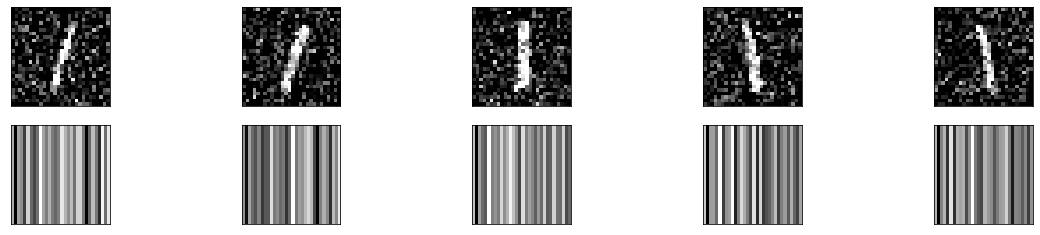

In [ ]:
# Build your encoder by using the first layer of your autoencoder
encoder = Sequential()
encoder.add(autoencoder.layers[0])

# Encode the noisy images and show the encodings for your favorite number [0-9]
encodings = encoder.predict(X_test_noise)
show_encodings(encodings, number = 1)

Instructions 2/2
<ul>
<li>Predict on <code>X_test_noise</code> with your <code>autoencoder</code>, this will effectively perform both the encoding and decoding.</li>
<li>Plot noisy vs decoded images with <code>compare_plot()</code>.</li>
</ul>

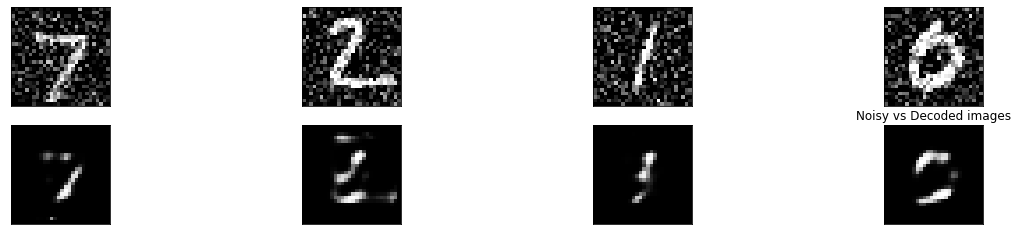

In [ ]:
# Predict on the noisy images with your autoencoder
decoded_imgs = autoencoder.predict(X_test_noise)

# Plot noisy vs decoded images
compare_plot(X_test_noise, decoded_imgs)

**The noise is gone now! You could get a better reconstruction by using a convolutional autoencoder. I hope this new model opened up your mind to the many possible architectures and non-classical ML problems that neural networks can solve :)**

## Intro to CNNs

### Building a CNN model

<div class=""><p>Building a CNN model in Keras isn't much more difficult than building any of the models you've already built throughout the course! You just need to make use of convolutional layers.</p>
<p>You're going to build a shallow convolutional <code>model</code> that classifies the <strong>MNIST</strong> digits dataset. The same one you de-noised with your autoencoder! The images are 28 x 28 pixels and <strong>just have one channel</strong>, since they are black and white pictures. </p>
<p>Go ahead and build this small convolutional model!</p></div>

Instructions
<ul>
<li>Import the <code>Conv2D</code> and <code>Flatten</code> layers and instantiate your model.</li>
<li>Add a first convolutional layer with 32 filters of size 3x3 and the corresponding 3D tuple as <code>input_shape</code>.</li>
<li>Add a second convolutional layer with 16 filters of size 3x3 with relu activation.</li>
<li>Flatten the previous layer output to create a one-dimensional vector.</li>
</ul>

In [43]:
# Import the Conv2D and Flatten layers and instantiate model
from keras.layers import Conv2D,Flatten
model = Sequential()

# Add a convolutional layer of 32 filters of size 3x3
model.add(Conv2D(32, kernel_size = 3, input_shape = (28, 28, 1), activation = 'relu'))

# Add a convolutional layer of 16 filters of size 3x3
model.add(Conv2D(16, kernel_size = 3, activation = 'relu'))

# Flatten the previous layer output
model.add(Flatten())

# Add as many outputs as classes with softmax activation
model.add(Dense(10, activation = 'softmax'))

In [29]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 24, 24, 16)        4624      
_________________________________________________________________
flatten_2 (Flatten)          (None, 9216)              0         
_________________________________________________________________
dense_2 (Dense)              (None, 10)                92170     
Total params: 97,114
Trainable params: 97,114
Non-trainable params: 0
_________________________________________________________________


### Looking at convolutions

<div class=""><p>Inspecting the activations of a convolutional layer is a cool thing. You have to do it at least once in your lifetime!</p>
<p>To do so, you will build a new model with the Keras <code>Model</code> object, which takes in a list of inputs and a list of outputs. The output you will provide to this new model is the first convolutional layer outputs when given an <strong>MNIST</strong> digit as input image.</p>
<p>The convolutional <code>model</code> you built in the previous exercise has already been trained for you. It can now correctly classify <strong>MNIST</strong> handwritten images. You can check it with <code>model.summary()</code> in the console.</p>
<p>Let's look at the convolutional masks that were learned in the first convolutional layer of this model!</p></div>

In [45]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()
X_train = np.reshape(X_train, [-1, 28, 28, 1])
X_test = np.reshape(X_test, [-1, 28, 28, 1])
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy']) #categorical_crossentropy
model.fit(X_train, y_train, epochs=15, batch_size=32) #verbose=0

Epoch 1/15
1875/1875 [==============================] - 8s 4ms/step - loss: 0.8674 - accuracy: 0.8989
Epoch 2/15
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0700 - accuracy: 0.9785
Epoch 3/15
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0439 - accuracy: 0.9865
Epoch 4/15
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0360 - accuracy: 0.9885
Epoch 5/15
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0292 - accuracy: 0.9911
Epoch 6/15
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0225 - accuracy: 0.9930
Epoch 7/15
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0197 - accuracy: 0.9943
Epoch 8/15
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0182 - accuracy: 0.9947
Epoch 9/15
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0134 - accuracy: 0.9961
Epoch 10/15
1875/1875 [==============================] - 8s 4ms/step - loss: 0.017

Instructions
<ul>
<li>Obtain a reference to the outputs of the first convolutional layer in the model.</li>
<li>Build a new model using the model's first layer input and the <code>first_layer_output</code> as outputs.</li>
<li>Use this <code>first_layer_model</code> to predict on <code>X_test</code>.</li>
<li>Plot the activations of the first digit of <code>X_test</code> for the <strong>15th</strong> and the <strong>18th</strong> neuron filter.</li>
</ul>

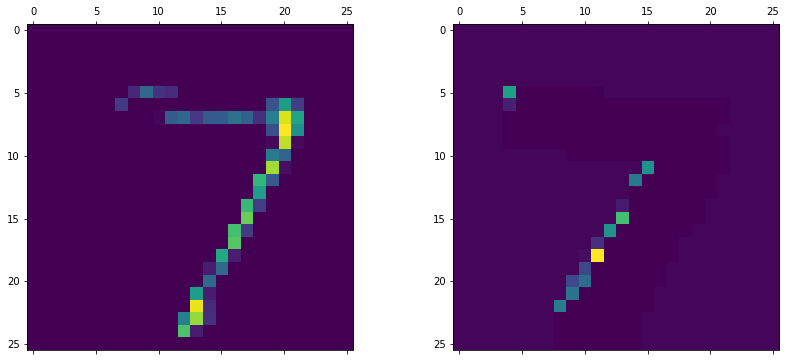

In [46]:
# Obtain a reference to the outputs of the first layer
first_layer_output = model.layers[0].output

# Build a model using the model's input and the first layer output
first_layer_model = tf.keras.Model(inputs = model.layers[0].input, outputs = first_layer_output)

# Use this model to predict on X_test
activations = first_layer_model.predict(X_test)

fig, axs = plt.subplots(1, 2, figsize=(14, 6))

# Plot the activations of first digit of X_test for the 15th filter
axs[0].matshow(activations[0,:,:,14], cmap = 'viridis')

# Do the same but for the 18th filter now
axs[1].matshow(activations[0,:,:,17], cmap = 'viridis')
plt.show()

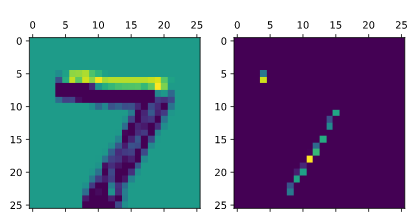

**Each neuron filter of the first layer learned a different convolution. The 15th filter (a.k.a convolutional mask) learned to detect horizontal traces in your digits. On the other hand, filter 18th seems to be checking for vertical traces.**

### Preparing your input image

<div class=""><p>The original <strong>ResNet50 model</strong> was trained with images of size <strong>224 x 224 pixels</strong> and a number of preprocessing operations; like the subtraction of the mean pixel value in the training set for all training images. You need to pre-process the images you want to predict on in the same way.</p>
<p>When predicting on a single image you need it to fit the model's input shape, which in this case looks like this: 
(batch-size, width, height, channels),<code>np.expand_dims</code> with parameter <code>axis = 0</code> adds the batch-size dimension, representing that a single image will be passed to predict. This batch-size dimension value is 1, since we are only predicting on one image.</p>
<p>You will go over these preprocessing steps as you prepare this dog's (named Ivy) image into one that can be classified by <strong>ResNet50</strong>.</p>
<p></p><center>
<img src="https://assets.datacamp.com/production/repositories/4335/datasets/56f1027f1b0d84caa98b0b3cd5b37cf68c13468c/dog.png" width="200px">
</center><p></p></div>

In [49]:
%%capture
!wget https://github.com/lnunesAI/Datacamp/raw/main/2-machine-learning-scientist-with-python/16-introduction-to-deep-learning-with-keras/figures/dog.jpg
img_path = 'dog.jpg'

Instructions
<ul>
<li>Import <code>image</code> from <code>keras.preprocessing</code> and <code>preprocess_input</code> from <code>keras.applications.resnet50</code>.</li>
<li>Load the image with the right <code>target_size</code> for your model.</li>
<li>Turn it into an array with <code>image.img_to_array()</code>.</li>
<li>Pre-process <code>img_expanded</code> the same way the original ResNet50 training images were processed with <code>preprocess_input()</code>.</li>
</ul>

In [50]:
# Import image and preprocess_input
from keras.preprocessing import image
from keras.applications.resnet50 import preprocess_input

# Load the image with the right target size for your model
img = image.load_img(img_path, target_size=(224, 224))

# Turn it into an array
img_array = image.img_to_array(img)

# Expand the dimensions of the image, this is so that it fits the expected model input format
img_expanded = np.expand_dims(img_array, axis = 0)

# Pre-process the img in the same way original images were
img_ready = preprocess_input(img_expanded)

**Ivy is now ready for ResNet50. Do you know this dog's breed? Let's see what this model thinks it is!**

### Using a real world model

<div class=""><p>Okay, so Ivy's picture is ready to be used by <strong>ResNet50</strong>. It is stored in <code>img_ready</code> and now looks like this:</p>
<p></p><center>
<img src="https://assets.datacamp.com/production/repositories/4335/datasets/f5092a58464fd6887e436db3eba85534fdf34bde/dog_processed.png" width="200px">
</center><p></p>
<p><strong>ResNet50</strong> is a model trained on the <strong>Imagenet dataset</strong> that is able to distinguish between 1000 different labeled objects. <strong>ResNet50</strong> is a deep model with 50 layers, you can check it in 3D <a href="https://tensorspace.org/html/playground/resnet50.html" target="_blank" rel="noopener noreferrer">here</a>.</p>
<p><code>ResNet50</code> and <code>decode_predictions</code> have both been imported from <code>keras.applications.resnet50</code> for you.</p>
<p>It's time to use this trained model to find out Ivy's breed!</p></div>

In [59]:
from tensorflow.keras.applications.resnet50 import ResNet50, decode_predictions

Instructions
<ul>
<li>Instantiate a <code>ResNet50</code> model, setting the weights parameter to be <code>'imagenet'</code>.</li>
<li>Use the <code>model</code> to predict on your processed image.</li>
<li>Decode the first 3 predictions with <code>decode_predictions()</code>.</li>
</ul>

In [60]:
# Instantiate a ResNet50 model with 'imagenet' weights
model = ResNet50(weights='imagenet')

# Predict with ResNet50 on your already processed img
preds = model.predict(img_ready)

# Decode the first 3 predictions
print('Predicted:', decode_predictions(preds, top=3)[0])

40960/35363 [==================================] - 0s 0us/step
Predicted: [('n02088364', 'beagle', 0.8576607), ('n02089867', 'Walker_hound', 0.10971683), ('n02089973', 'English_foxhound', 0.028342847)]


**Now you know Ivy is quite probably a Beagle and that deep learning models that have already been trained for you are easy to use!**

## Intro to LSTMs

In [ ]:
# Make lines
lines = []
for i in range(seq_len, len(words) + 1):
  line = ' '.join(words[i-seq_len:i])
  lines.append(line)

### Text prediction with LSTMs

<div class=""><p>During the following exercises you will build a toy LSTM model that is able to predict the next word using a small text dataset. 
This dataset consist of cleaned quotes from the <strong>The Lord of the Ring</strong> movies. You can find them in the <code>text</code> variable.</p>
<p>You will turn this <code>text</code> into <code>sequences</code> of <strong>length 4</strong> and make use of the Keras <code>Tokenizer</code> to prepare the features and labels for your model!</p>
<p>The Keras <code>Tokenizer</code> is already imported for you to use. It assigns a unique number to each unique word, and stores the mappings in a dictionary. This is important since the model deals with numbers but we later will want to decode the output numbers back into words.</p></div>

In [1]:
from tensorflow.keras.preprocessing.text import Tokenizer
text = 'it is not the strength of the body but the strength of the spirit it is useless to meet revenge with revenge it will heal nothing even the smallest person can change the course of history all we have to decide is what to do with the time that is given us the burned hand teaches best after that advice about fire goes to the heart'

Instructions
<ul>
<li>Split the text into an array of words using <code>.split()</code>.</li>
<li>Make sentences of 4 words each, moving one word at a time.</li>
<li>Instantiate a <code>Tokenizer()</code>, then fit it on the sentences with <code>.fit_on_texts()</code>.</li>
<li>Turn <code>sentences</code> into a sequence of numbers calling <code>.texts_to_sequences()</code>.</li>
</ul>

In [4]:
# Split text into an array of words 
words = text.split()

# Make sentences of 4 words each, moving one word at a time
sentences = []
for i in range(4, len(words)):
  sentences.append(' '.join(words[i-4:i]))

# Instantiate a Tokenizer, then fit it on the sentences
tokenizer = Tokenizer()
tokenizer.fit_on_texts(sentences)

# Turn sentences into a sequence of numbers
sequences = tokenizer.texts_to_sequences(sentences)
print("Sentences: \n {} \n Sequences: \n {}".format(sentences[:5],sequences[:5]))

Sentences: 
 ['it is not the', 'is not the strength', 'not the strength of', 'the strength of the', 'strength of the body'] 
 Sequences: 
 [[5, 2, 42, 1], [2, 42, 1, 6], [42, 1, 6, 4], [1, 6, 4, 1], [6, 4, 1, 10]]


**Your sentences are now sequences of numbers, check that identical words are assigned the same number.**

### Build your LSTM model

<div class=""><p>You've already prepared your sequences of text. It's time to build your LSTM model!</p>
<p>Remember your sequences had 4 words each, your model will be trained on the first three words of each sequence, predicting the 4th one. You are going to use an <code>Embedding</code> layer that will essentially learn to turn words into vectors. These vectors will then be passed to a simple <code>LSTM</code> layer. Our output is a <code>Dense</code> layer with as many neurons as words in the vocabulary and <code>softmax</code> activation. This is because we want to obtain the highest probable next word out of all possible words.</p>
<p>The size of the vocabulary of words (the unique number of words) is stored in <code>vocab_size</code>.</p></div>

In [6]:
vocab_size = len(tokenizer.word_counts) + 1

Instructions
<ul>
<li>Import the <code>Embedding</code>, <code>LSTM</code> and <code>Dense</code> layer from Keras layers.</li>
<li>Add an <code>Embedding()</code> layer of the vocabulary size, that will turn words into 8 number vectors and receive sequences of length 3.</li>
<li>Add a 32 neuron <code>LSTM()</code> layer.</li>
<li>Add a hidden <code>Dense()</code> layer of 32 neurons and an output layer of <code>vocab_size</code> neurons with <code>softmax</code>.</li>
</ul>

In [43]:
# Import the Embedding, LSTM and Dense layer
from keras.layers import Embedding, LSTM, Dense

model = Sequential()

# Add an Embedding layer with the right parameters
model.add(Embedding(input_dim = vocab_size, input_length = 3, output_dim = 8, ))

# Add a 32 unit LSTM layer
model.add(LSTM(32))

# Add a hidden Dense layer of 32 units and an output layer of vocab_size with softmax
model.add(Dense(32, activation='relu'))
model.add(Dense(vocab_size, activation='softmax'))
model.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_5 (Embedding)      (None, 3, 8)              352       
_________________________________________________________________
lstm_5 (LSTM)                (None, 32)                5248      
_________________________________________________________________
dense_10 (Dense)             (None, 32)                1056      
_________________________________________________________________
dense_11 (Dense)             (None, 44)                1452      
Total params: 8,108
Trainable params: 8,108
Non-trainable params: 0
_________________________________________________________________


**You'll see that this model is powerful enough to learn text relationships, we aren't using a lot of text in this tiny example and our sequences are quite short. This model is to be trained as usual, you would just need to compile it with an optimizer like adam and use crossentropy loss. This is because we have modeled this next word prediction task as a classification problem with all the unique words in our vocabulary as candidate classes.**

### Decode your predictions

<div class=""><p>Your LSTM <code>model</code> has already been trained (details in the previous exercise success message) so that you don't have to wait. It's time to <strong>define a function</strong> that decodes its predictions. The trained <code>model</code> will be passed as a default parameter to this function.</p>
<p>Since you are predicting on a model that uses the softmax function, numpy's <code>argmax()</code> can be used to obtain the index/position representing the most probable next word out of the output vector of probabilities.</p>
<p>The <code>tokenizer</code> you previously created and fitted, is loaded for you.  You will be making use of its internal <code>index_word</code> dictionary to turn the <code>model</code>'s next word prediction (which is an integer) into the actual written word it represents. </p>
<p>You're very close to experimenting with your model!</p></div>

In [45]:
np_sequences = np.array(sequences)
print(np_sequences.shape)

X = np_sequences[:, :3]
y = np_sequences[:, 3]
y = to_categorical(y, num_classes=vocab_size)

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
history = model.fit(X, y, epochs=500, verbose=0);

(62, 4)


Instructions
<ul>
<li>Use <code>texts_to_sequences()</code> to turn the <code>test_text</code> parameter into a sequence of numbers.</li>
<li>Get the model's next word prediction by passing in <code>test_seq</code> . The index/position representing the word with the highest probability is obtained by calling <code>.argmax(axis=1)[0]</code> on the numpy array of predictions.</li>
<li>Return the word that maps to the prediction using the tokenizer's <code>index_word</code> dictionary.</li>
</ul>

In [44]:
def predict_text(test_text, model = model):
  if len(test_text.split()) != 3:
    print('Text input should be 3 words!')
    return False
  
  # Turn the test_text into a sequence of numbers
  test_seq = tokenizer.texts_to_sequences([test_text])
  test_seq = np.array(test_seq)
  
  # Use the model passed as a parameter to predict the next word
  pred = model.predict(test_seq).argmax(axis = 1)[0]
  
  # Return the word that maps to the prediction
  return tokenizer.index_word[pred]

**It's finally time to try out your model and see how well it does!**

### Test your model!

<div class=""><p>The function you just built, <code>predict_text()</code>, is ready to use. <em>Remember that the model object is already passed by default as the second parameter so you just need to provide the function with your 3 word sentences.</em></p>
<p>Try out these strings on your LSTM model:</p>
<ul>
<li><code>'meet revenge with'</code></li>
<li><code>'the course of'</code></li>
<li><code>'strength of the'</code></li>
</ul>
<p>Which sentence could be made with the word output from the sentences above?</p></div>

In [46]:
predict_text('meet revenge with'), predict_text('the course of'), predict_text('strength of the')

('revenge', 'history', 'spirit')

<pre>
Possible Answers

A worthless gnome is king

<b>Revenge is your history and spirit</b>

Take a sword and ride to Florida

</pre>

# Test_base

In [ ]:
from keras.models import Sequential
from keras.layers import Dense
from keras.callbacks import EarlyStopping, ModelCheckpoint

In [ ]:
https://goodboychan.github.io/chans_jupyter/python/datacamp/machine_learning/2020/07/08/01-Exploring-high-dimensional-data.html

In [ ]:
diabetes_df = pd.read_csv('https://raw.githubusercontent.com/lnunesAI/Datacamp/main/2-machine-learning-scientist-with-python/7-dimensionality-reduction-in-python/datasets/diabetes_df.csv')

In [ ]:
!pip install -U scikit-learn=='0.20.3'

In [ ]:
https://goodboychan.github.io/chans_jupyter/python/datacamp/machine_learning/2020/07/08/01-Exploring-high-dimensional-data.html

Instructions 1/2

Instructions 2/2



---



Instructions 1/3

Instructions 2/3

Instructions 3/3



---



Instructions 1/4

Instructions 2/4

Instructions 3/4

Instructions 4/4

<pre>
Possible Answers

<b></b>

</pre>

<b>Combined, the 5 individuals hold \$50,000 in bonds.</b>

In [ ]:
X, y = pokemon_df .iloc[:, :-1], pokemon_df .iloc[:, -1]

In [ ]:
#@title ⠀ { display-mode: "form" }

In [ ]:
%%capture
!wget https://github.com/lnunesAI/Datacamp/raw/main/2-machine-learning-scientist-with-python/16-introduction-to-deep-learning-with-keras/datasets/digits_noise.h5

In [ ]:
X = np.random.random(size=(100,20))
y = np.random.choice([0, 1], size=(100,), p=[1./3, 2./3])

https://www.oreilly.com/library/view/python-and-hdf5/9781491944981/ch04.html

In [ ]:
ls -s

In [ ]:
import h5py
X = sign_language_features
y = sign_language_labels
h5f = h5py.File('letters_images.h5', 'w')
h5f.create_dataset('sign_language_features', data=X, compression='lzf') #gzip
h5f.create_dataset('sign_language_labels', data=y, compression='lzf')
h5f.close()

In [ ]:
import h5py
h5f = h5py.File('digits_noise.h5', 'w')
h5f.create_dataset('X_test_noise', data=X_test_noise, compression='gzip')
h5f.create_dataset('y_test', data=y_test, compression='gzip')
h5f.close()

In [ ]:
import h5py
h5f = h5py.File('digits.h5', 'w')
h5f.create_dataset('X_train', data=X_train, compression='gzip')
h5f.create_dataset('y_train', data=y_train, compression='gzip')
h5f.create_dataset('X_test', data=X_test, compression='gzip')
h5f.create_dataset('y_test', data=y_test, compression='gzip')
h5f.close()

In [ ]:
import h5py
h5f = h5py.File('digits.h5','r')
X_train = h5f['X_train'][:]
y_train = h5f['y_train'][:]
X_test = h5f['X_test'][:]
y_test = h5f['y_test'][:]
h5f.close()
#np.allclose(a,b)

In [ ]:
hf.keys()


In [ ]:
import h5py
h5f = h5py.File('credit_card.h5','r')
a = h5f['borrower_features'][:]
b = h5f['default'][:]
c = h5f['test_features'][:]
d = h5f['test_targets'][:]
h5f.close()
#np.allclose(a,b)
#h5f.keys()

In [ ]:
model.get_config()
model.optimizer.__class__.__name__
model.optimizer.__class__.__callback__